Clasificador de casos de Covid-19
---

Fuente del dataset: https://datos.gob.mx/busca/dataset/informacion-referente-a-casos-covid-19-en-mexico

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

Cargar el dataset.

In [2]:
df = pd.read_csv('220321COVID19MEXICO.csv')

C:\Users\ale_m\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (38) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Inspeccionar las observaciones.

In [3]:
df.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2022-03-21,z3bf80,2,12,8,2,8,8,37,1,...,2,1,1,2,97,3,99,México,97,97
1,2022-03-21,z1e370,1,12,14,1,14,14,85,1,...,2,1,2,2,97,7,99,México,97,97
2,2022-03-21,zze974,1,6,24,1,24,24,35,1,...,1,1,2,2,97,7,99,México,97,97
3,2022-03-21,zz7067,1,12,9,2,9,9,7,1,...,2,1,2,2,97,7,99,México,97,97
4,2022-03-21,z1da1e,1,12,1,2,1,1,1,1,...,1,1,2,2,97,7,99,México,97,97


Verificar si hay valores faltantes.

Se observa que no hay, así que no es necesario imputar valores.

In [4]:
df.isna().sum()

FECHA_ACTUALIZACION      0
ID_REGISTRO              0
ORIGEN                   0
SECTOR                   0
ENTIDAD_UM               0
SEXO                     0
ENTIDAD_NAC              0
ENTIDAD_RES              0
MUNICIPIO_RES            0
TIPO_PACIENTE            0
FECHA_INGRESO            0
FECHA_SINTOMAS           0
FECHA_DEF                0
INTUBADO                 0
NEUMONIA                 0
EDAD                     0
NACIONALIDAD             0
EMBARAZO                 0
HABLA_LENGUA_INDIG       0
INDIGENA                 0
DIABETES                 0
EPOC                     0
ASMA                     0
INMUSUPR                 0
HIPERTENSION             0
OTRA_COM                 0
CARDIOVASCULAR           0
OBESIDAD                 0
RENAL_CRONICA            0
TABAQUISMO               0
OTRO_CASO                0
TOMA_MUESTRA_LAB         0
RESULTADO_LAB            0
TOMA_MUESTRA_ANTIGENO    0
RESULTADO_ANTIGENO       0
CLASIFICACION_FINAL      0
MIGRANTE                 0
P

Gráfica que la distribución de las clasificaciones de casos de covid.

1. Caso de Covid confirmado por asociación clínica epidemiológica.
2. Caso de Covid confirmado por comité de dictaminación.
3. Caso de Sars-Cov-2 Confirmado.
4. Inválido por laboratorio.
5. No realizado por laboratorio.
6. Caso sospechoso.
7. Negativo a Sars-Cov-2.

Las observaciones que nos interesan son las que se clasifican como **Caso de Sars-Cov-2 Confirmado. (3)** y **Negativo a Sars-Cov-2 (7)**,
pues para confirmar los pacientes pasaron por pruebas de laboratorio o antígenos.


<AxesSubplot:xlabel='CLASIFICACION_FINAL'>

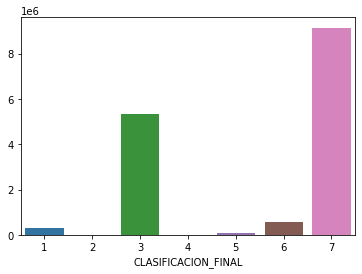

In [23]:
sns.barplot(x = 'CLASIFICACION_FINAL', y = np.ones(df.shape[0]), data = df, estimator = np.sum)

Muestreo de 1000 observaciones

In [7]:
sample_df = df.sample(n = 1000)

In [13]:
sample_df['CLASIFICACION_FINAL'].describe()

count    1000.000000
mean        5.433000
std         1.968092
min         1.000000
25%         3.000000
50%         7.000000
75%         7.000000
max         7.000000
Name: CLASIFICACION_FINAL, dtype: float64

<AxesSubplot:xlabel='CLASIFICACION_FINAL'>

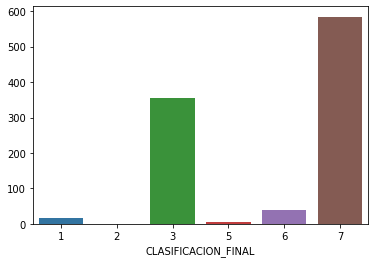

In [20]:
sns.barplot(x = 'CLASIFICACION_FINAL', y = np.ones(1000), data = sample_df, estimator = np.sum)

In [24]:
sample_df.to_csv('sample_of_covid_cases.csv')

In [6]:
sample_df = pd.read_csv('sample_of_covid_cases.csv')

# Preprocesado

Filtrar por Sector. Excluir las no especificadas = 99

Variables a usar:

- SEXO
- TIPO_PACIENTE
- INTUBADO
- NEUMONIA
- EDAD
- NACIONALIDAD
- EMBARAZO
- DIABETES
- EPOC
- ASMA
- INMUSUPR
- HIPERTENCION
- OTRAS_COM
- CARDIOVASCULAR
- OBESIDAD
- RENAL_CRONICA
- TABAQUISMO
- OTRO_CASO
- MIGRANTE
- UCI

## Filtrar observaciones

In [82]:
prep_df = df[ df['SECTOR'] != 99 ]
prep_df.shape

(15453417, 40)

In [83]:
predict = ['SEXO', 'TIPO_PACIENTE', 'INTUBADO', 'NEUMONIA', 'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'MIGRANTE', 'UCI', 'CLASIFICACION_FINAL']
prep_df = prep_df[ predict ] 
prep_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15453417 entries, 0 to 15453957
Data columns (total 21 columns):
 #   Column               Dtype
---  ------               -----
 0   SEXO                 int64
 1   TIPO_PACIENTE        int64
 2   INTUBADO             int64
 3   NEUMONIA             int64
 4   EDAD                 int64
 5   NACIONALIDAD         int64
 6   EMBARAZO             int64
 7   DIABETES             int64
 8   EPOC                 int64
 9   ASMA                 int64
 10  INMUSUPR             int64
 11  HIPERTENSION         int64
 12  OTRA_COM             int64
 13  CARDIOVASCULAR       int64
 14  OBESIDAD             int64
 15  RENAL_CRONICA        int64
 16  TABAQUISMO           int64
 17  OTRO_CASO            int64
 18  MIGRANTE             int64
 19  UCI                  int64
 20  CLASIFICACION_FINAL  int64
dtypes: int64(21)
memory usage: 2.5 GB


# Estraer los casos positivos y negativos

Aislar casos positivos y negativos.

In [84]:
set_positive_cases = prep_df[ prep_df['CLASIFICACION_FINAL'] == 3 ]
set_negative_cases = prep_df[ prep_df['CLASIFICACION_FINAL'] == 7 ]

print(set_positive_cases.shape)
print(set_negative_cases.shape)

(5322853, 21)
(9141020, 21)


Reasignarles valores para positivo (1) y negativo (0).

In [85]:
set_positive_cases[:]['CLASIFICACION_FINAL'] = 1
set_negative_cases[:]['CLASIFICACION_FINAL'] = 0

In [86]:
set_positive_cases['CLASIFICACION_FINAL'].head()

0     1
14    1
17    1
19    1
22    1
Name: CLASIFICACION_FINAL, dtype: int64

In [87]:
set_negative_cases['CLASIFICACION_FINAL'].head()

1    0
2    0
3    0
4    0
5    0
Name: CLASIFICACION_FINAL, dtype: int64

Combinar todos los casos positivos y negativos en un solo dataframe.

In [88]:
pos_neg_set = pd.concat([set_positive_cases, set_negative_cases])

# Valancear clases

In [89]:
sample_positive_cases = set_positive_cases.sample(n = 500000)
sample_negative_cases = set_negative_cases.sample(n = 500000)

print(sample_positive_cases.shape)
print(sample_negative_cases.shape)

(500000, 21)
(500000, 21)


In [90]:
valanced_sample = pd.concat([sample_positive_cases, sample_negative_cases])
print(valanced_sample.shape)

(1000000, 21)


Guardar la muestra en un CSV.

In [52]:
valanced_sample.to_csv('valanced_sample.csv')

# Separar conjunto de prueba y de entrenamiento

In [14]:
from sklearn.model_selection import train_test_split

In [91]:
y = valanced_sample.pop('CLASIFICACION_FINAL')
X = valanced_sample

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(700000, 20)
(300000, 20)
(700000,)
(300000,)


# Modelado

## Redes Neuronales

Se usará una red neuronal y se probarán diferentes parámetros para tratar de encontrar el mejor resultado.

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(8, input_shape=(20,), activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=35, verbose = 0)
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 8)                 168       
                                                                 
 dense_37 (Dense)            (None, 4)                 36        
                                                                 
 dense_38 (Dense)            (None, 2)                 10        
                                                                 
 dense_39 (Dense)            (None, 1)                 3         
                                                                 
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________


Se guardarán los valores de los parámetros de la red en el disco para un uso posterior.

In [45]:
# Gaurda los valores de los parámetros de la red.
model.save('neural_network')

INFO:tensorflow:Assets written to: neural_network.bin\assets


INFO:tensorflow:Assets written to: neural_network.bin\assets


In [ ]:
# Cargar la red neuronal.
# Sólo usar si ya se ha guardado una red neuronal previamente.
from keras.models import load_model
model = load_model('neural_network')
model.summary()

Evaluación del modelo.

In [41]:
nnet_metrics = model.evaluate(X_test, y_test)

9375/9375 [==============================] - 19s 2ms/step - loss: 0.6806 - accuracy: 0.5372


In [42]:
print('Métricas de la red neuronal:')
for i in range( len(model.metrics_names ) ):
    print('{}: {}'.format(model.metrics_names[i], nnet_metrics[i]))

Métricas:
loss: 0.6805607080459595
accuracy: 0.5372400283813477


Predecir un caso:

In [70]:
samp = pos_neg_set.sample()
actual_class = int(samp.pop('CLASIFICACION_FINAL'))
print(samp)
print('Clasification:', actual_class)

         SEXO  TIPO_PACIENTE  INTUBADO  NEUMONIA  EDAD  NACIONALIDAD  \
7961899     1              1        97         2    37             1   

         EMBARAZO  DIABETES  EPOC  ASMA  INMUSUPR  HIPERTENSION  OTRA_COM  \
7961899         2         2     2     2         2             2         2   

         CARDIOVASCULAR  OBESIDAD  RENAL_CRONICA  TABAQUISMO  OTRO_CASO  \
7961899               2         2              2           2          2   

         MIGRANTE  UCI  
7961899        99   97  
Clasification: 0


In [92]:
pred_proba = model.predict(samp)
pred = int( pred_proba > 0.5 )
print('Probability predicted:', pred_proba)
print('Class predicted:', pred)

Probability predicted: [[0.48030823]]
Class predicted: 0


## Regresión logística

In [43]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\ale_m\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
print('Accuracy:', end='')
print(logreg.score(X_test, y_test))

Accuracy:0.53236


In [81]:
pred = logreg.predict(samp)
pred_proba = logreg.predict_proba(samp)
print('Classes:', logreg.classes_)
print('Probability predicted:', pred_proba)
print('Class predicted:', pred)

Classes: [0 1]
Probability predicted: [[0.52757436 0.47242564]]
Class predicted: [0]
